In [ ]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
#read
imdb = pd.read_csv('imdbmovies.csv')
imdb.head(2)

In [ ]:
#cleaning NA from imdb df based on budget,wwgross and production_company columns, to display only studios with budget and gross
budget_na = imdb[imdb['budget'].str.len() > 0]
wwgross_na  = budget_na[budget_na['worlwide_gross_income'].str.len() > 0]
usa_gross_na= wwgross_na[wwgross_na['usa_gross_income'].str.len() > 0]
studio_df=pd.DataFrame(usa_gross_na)
studio_df.head()

In [ ]:
#currency converter

currency_converter = {
  "ATS": 0.79,
  "THB": 0.033,
  "PLN": 0.27,
  'NOK':  0.12,
 'NGN': 0.0026,
 'BEF':  0.030,
 'IEP':  1.54,
 'NOK':  0.12,
 'NGN': 0.0026,
 'BEF':  0.030,
 'IEP':  1.54,
 'CZK': 0.047,
 'CAD': 0.79,
 'HUF':  0.0034,
 'FRF': 0.185, 
 'CLP': 0.0014,
 'CNY':  0.15,
 'JPY':0.0095,
 'AUD':0.79,
 'GBP' : 1.41, 
'BRL': 0.18,
 'ZAR': 0.069,

 'ARS': 0.011,
 'RUR': 0.013,
 'SGD': 0.76,
 'ESP': 1.22,
 'DOP': 0.017,
 'KRW': 0.00090, 
'DEM': 0.621,
 'FIM': 0.2041,
 'CHF': 1.10,
 'SEK': 0.12,
'INR':0.014,
 'ILS': 0.31,
 'ITL': 0.000627,
 'MXN': 0.049,
 'ISK': 0.0078,
 'VEB': 0.100125,
 'HKD': 0.13,
 'DKK': 0.16,
 'EUR': 1.22,
 'NZD': 0.73,
   '$':1 
}

#currency_converter

In [ ]:
#retrieving all currencies

#converting dollar and non dollar currencies into dollar value


def currency_converter_func(currency_conv_list, currency_converter):
    
    """This function takes a a dictionary of currencies and their dollar conversion rate (currency_conv_list)
       and certain amounts of money with their respective currency attached and converts to its  dollar value
    """
    converted_usd_rate = []
    for i in currency_conv_list:
        for j, y in currency_converter.items():
            init = i.split()
            curr_key = init[0]
            curr_value = init[1]
            if curr_key == j:
                convert_rate = int(init[1]) * y
                converted_usd_rate.append(convert_rate)
            
    return converted_usd_rate


#converted_usd_rate   
    
#len(converted_usd_rate)

In [31]:
#converting dollar and non dollar currencies into dollar value

currency_conv_list = studio_df["budget"].tolist()

converted_currencies = currency_converter_func(currency_conv_list, currency_converter)
#converted_currencies



In [32]:
#converting the currencies into dollars and adding to dataframe

converted_usd_rate_df = pd.DataFrame(converted_currencies)
converted_usd_rate_df.rename(columns={0:"Budget_Dollar_Equiv"}, inplace=True)
converted_usd_rate_df



,Budget_Dollar_Equiv
0,18000.0
1,800000.0
2,3726000.0
3,1500000.0
4,1500000.0
...,...
8121,10000000.0
8122,5000000.0
8123,11100000.0
8124,12000000.0


In [33]:
#creating a copy of the studio_df data
merged_studio_dollar_df = studio_df

#merging the converted dollar equivalent values to the dataframe

merged_studio_dollar_df["Budget_Dollar_Equiv"] = converted_currencies
merged_studio_dollar_df.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget,norm_votes,norm_critics,norm_users,rated_movie
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,160.0,18000.0,8811.0,8811.0,-9189.0,-51.050000,0.024356,0.159319,0.022538,0.068738
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,16.0,800000.0,9183673.0,9183673.0,8383673.0,1047.959125,0.001298,0.015030,0.004202,0.006843
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,208.0,3726000.0,1236166.0,1349711.0,-2376289.0,-63.775872,0.068448,0.207415,0.047178,0.107680
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,122.0,1500000.0,19181.0,46008.0,-1453992.0,-96.932800,0.071341,0.121242,0.028078,0.073554
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,115.0,1500000.0,163577.0,457688.0,-1042312.0,-69.487467,0.092661,0.114228,0.029224,0.078704


In [34]:
#getting rid of dollar sign and converting value into float and putting them back to dataframe

def dollar_splitter(splitter):
    splitted_value = []
    for i in splitter:
        init = i.split()
        curr_value = float(init[1])
        splitted_value.append(curr_value)
    return splitted_value

    
merged_studio_dollar_df["new_usa_gross_income"] = dollar_splitter(merged_studio_dollar_df["usa_gross_income"])
merged_studio_dollar_df["new_worlwide_gross_income"] = dollar_splitter(merged_studio_dollar_df["worlwide_gross_income"])

merged_studio_dollar_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget,norm_votes,norm_critics,norm_users,rated_movie
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,160.0,18000.0,8811.0,8811.0,-9189.0,-51.050000,0.024356,0.159319,0.022538,0.068738
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,16.0,800000.0,9183673.0,9183673.0,8383673.0,1047.959125,0.001298,0.015030,0.004202,0.006843
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,208.0,3726000.0,1236166.0,1349711.0,-2376289.0,-63.775872,0.068448,0.207415,0.047178,0.107680
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,122.0,1500000.0,19181.0,46008.0,-1453992.0,-96.932800,0.071341,0.121242,0.028078,0.073554
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,115.0,1500000.0,163577.0,457688.0,-1042312.0,-69.487467,0.092661,0.114228,0.029224,0.078704


In [35]:
#profit margins

merged_studio_dollar_df["profit_gross_budget"] = merged_studio_dollar_df["new_worlwide_gross_income"] - merged_studio_dollar_df["Budget_Dollar_Equiv"]
merged_studio_dollar_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget,norm_votes,norm_critics,norm_users,rated_movie
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,160.0,18000.0,8811.0,8811.0,-9189.0,-51.050000,0.024356,0.159319,0.022538,0.068738
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,16.0,800000.0,9183673.0,9183673.0,8383673.0,1047.959125,0.001298,0.015030,0.004202,0.006843
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,208.0,3726000.0,1236166.0,1349711.0,-2376289.0,-63.775872,0.068448,0.207415,0.047178,0.107680
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,122.0,1500000.0,19181.0,46008.0,-1453992.0,-96.932800,0.071341,0.121242,0.028078,0.073554
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,115.0,1500000.0,163577.0,457688.0,-1042312.0,-69.487467,0.092661,0.114228,0.029224,0.078704


In [36]:
#print the top 10 movies by profit
top_10=merged_studio_dollar_df.nlargest(10,'profit_gross_budget')
top_10

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget,norm_votes,norm_critics,norm_users,rated_movie
49415,tt0499549,Avatar,Avatar,2009,2010-01-15,"Action, Adventure, Fantasy",162,USA,"English, Spanish",James Cameron,...,733.0,237000000.0,760507625.0,2.790439e+09,2.553439e+09,1077.400461,0.483187,0.733467,0.328622,0.515092
73865,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,2019-04-24,"Action, Adventure, Drama",181,USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo",...,557.0,356000000.0,858373000.0,2.797801e+09,2.441801e+09,685.899035,0.331185,0.557114,0.846911,0.578403
31086,tt0120338,Titanic,Titanic,1997,1998-01-16,"Drama, Romance",194,"USA, Mexico, Australia, Canada","English, Swedish, Italian, French",James Cameron,...,331.0,200000000.0,659363944.0,2.195170e+09,1.995170e+09,997.584935,0.448967,0.330661,0.275332,0.351653
67523,tt2488496,Star Wars - Il risveglio della Forza,Star Wars: Episode VII - The Force Awakens,2015,2015-12-16,"Action, Adventure, Sci-Fi",138,USA,English,J.J. Abrams,...,909.0,245000000.0,936662225.0,2.068224e+09,1.823224e+09,744.173076,0.370819,0.909820,0.460414,0.580351
73864,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,2018-04-25,"Action, Adventure, Sci-Fi",149,USA,English,"Anthony Russo, Joe Russo",...,611.0,321000000.0,678815482.0,2.048360e+09,1.727360e+09,538.118303,0.349484,0.611222,0.407984,0.456230
43822,tt0369610,Jurassic World,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",124,USA,English,Colin Trevorrow,...,698.0,150000000.0,652270625.0,1.670401e+09,1.520401e+09,1013.600963,0.249880,0.698397,0.146691,0.364989
79633,tt6105098,Il Re Leone,The Lion King,2019,2019-08-21,"Animation, Adventure, Drama",118,"USA, UK, South Africa","English, Xhosa, Zulu, French, Spanish",Jon Favreau,...,370.0,260000000.0,543638043.0,1.656964e+09,1.396964e+09,537.293765,0.087514,0.369739,0.276669,0.244641
68760,tt2820852,Fast & Furious 7,Fast & Furious 7,2015,2015-04-02,"Action, Adventure, Thriller",137,"USA, China, Japan, Canada, United Arab Emirates","English, Thai, Arabic, Spanish",James Wan,...,462.0,190000000.0,353007020.0,1.515048e+09,1.325048e+09,697.393764,0.155113,0.461924,0.070958,0.229331
74934,tt4520988,Frozen II - Il segreto di Arendelle,Frozen II,2019,2019-11-27,"Animation, Adventure, Comedy",103,USA,English,"Chris Buck, Jennifer Lee",...,275.0,150000000.0,477373578.0,1.450027e+09,1.300027e+09,866.684622,0.053828,0.274549,0.124248,0.150875
50773,tt0848228,The Avengers,The Avengers,2012,2012-04-25,"Action, Adventure, Sci-Fi",143,USA,"English, Russian, Hindi",Joss Whedon,...,755.0,220000000.0,623357910.0,1.518814e+09,1.298814e+09,590.370094,0.544651,0.755511,0.184605,0.494922


Text(0, 0.5, 'Profit')

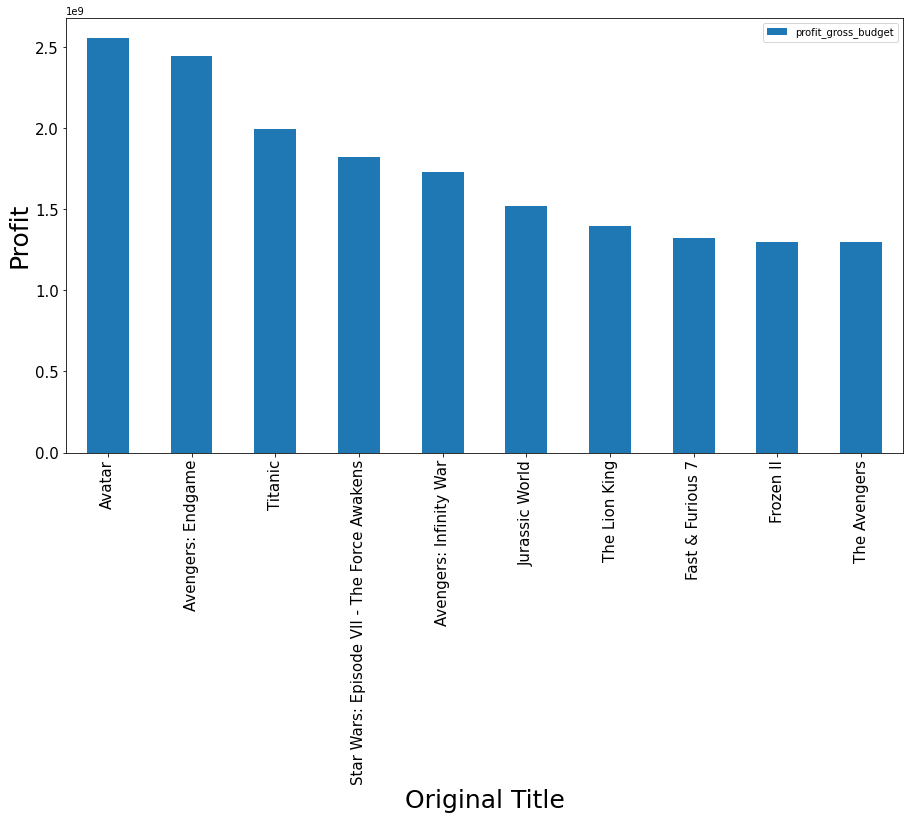

In [37]:
#visualizing the top 10 movies in terms of profit

top_profit=top_10[['original_title',"profit_gross_budget"]]
top_profit.plot.bar(x='original_title',y='profit_gross_budget',figsize=(15,8), fontsize=15)
plt.xlabel("Original Title", fontsize=25)
plt.ylabel("Profit", fontsize=25)



In [38]:
#percentage profit
merged_studio_dollar_df["percent_profit_gross_budget"] = ((merged_studio_dollar_df["new_worlwide_gross_income"] - merged_studio_dollar_df["Budget_Dollar_Equiv"])/merged_studio_dollar_df["Budget_Dollar_Equiv"])*100
merged_studio_dollar_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget,norm_votes,norm_critics,norm_users,rated_movie
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,160.0,18000.0,8811.0,8811.0,-9189.0,-51.050000,0.024356,0.159319,0.022538,0.068738
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,16.0,800000.0,9183673.0,9183673.0,8383673.0,1047.959125,0.001298,0.015030,0.004202,0.006843
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,208.0,3726000.0,1236166.0,1349711.0,-2376289.0,-63.775872,0.068448,0.207415,0.047178,0.107680
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,122.0,1500000.0,19181.0,46008.0,-1453992.0,-96.932800,0.071341,0.121242,0.028078,0.073554
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,115.0,1500000.0,163577.0,457688.0,-1042312.0,-69.487467,0.092661,0.114228,0.029224,0.078704


In [39]:
#making a copy of the dataset
highest_grossing_co=merged_studio_dollar_df
highest_grossing_co

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget,norm_votes,norm_critics,norm_users,rated_movie
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,160.0,18000.0,8811.0,8811.0,-9189.0,-51.050000,0.024356,0.159319,0.022538,0.068738
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,16.0,800000.0,9183673.0,9183673.0,8383673.0,1047.959125,0.001298,0.015030,0.004202,0.006843
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,208.0,3726000.0,1236166.0,1349711.0,-2376289.0,-63.775872,0.068448,0.207415,0.047178,0.107680
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,122.0,1500000.0,19181.0,46008.0,-1453992.0,-96.932800,0.071341,0.121242,0.028078,0.073554
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,115.0,1500000.0,163577.0,457688.0,-1042312.0,-69.487467,0.092661,0.114228,0.029224,0.078704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85274,tt9214832,Emma.,Emma.,2020,2020-03-27,"Comedy, Drama",124,UK,English,Autumn de Wilde,...,188.0,10000000.0,10055355.0,25659965.0,15659965.0,156.599650,0.008671,0.187375,0.029892,0.075312
85397,tt9354944,Jexi,Jexi,2019,2019-10-11,"Comedy, Romance",84,"USA, Canada",English,"Jon Lucas, Scott Moore",...,42.0,5000000.0,6546159.0,9341824.0,4341824.0,86.836480,0.007433,0.041082,0.022252,0.023589
85460,tt9426210,Weathering with You,Tenki no ko,2019,2019-10-14,"Animation, Drama, Family",112,"Japan, China",Japanese,Makoto Shinkai,...,110.0,11100000.0,7798743.0,193176979.0,182076979.0,1640.333144,0.007099,0.109218,0.016808,0.044375
85740,tt9779516,Cosa mi lasci di te,I Still Believe,2020,2020-03-19,"Biography, Drama, Music",116,USA,English,"Andrew Erwin, Jon Erwin",...,52.0,12000000.0,9868521.0,13681524.0,1681524.0,14.012700,0.002675,0.051102,0.014325,0.022701


In [40]:
#summing up the profits by company
grouped_profit=highest_grossing_co.groupby(['production_company'])['profit_gross_budget'].sum()
grouped_budget=highest_grossing_co.groupby(['production_company'])['Budget_Dollar_Equiv'].sum()


In [41]:
grouped_profit_df=pd.DataFrame(grouped_profit)
grouped_profit_df.describe()


,profit_gross_budget
count,3.103000e+03
mean,1.221999e+08
std,1.412560e+09
min,-8.521021e+08
25%,-4.579804e+06
50%,-3.782620e+05
75%,1.311285e+07
max,3.584629e+10


In [42]:
## dataframe for studios and their profit and production budget
grouped_budget_df=pd.DataFrame(grouped_budget)
grouped_budget_df.describe()
grouped_budget_df["profit_gross_profit"] = grouped_profit_df["profit_gross_budget"]
grouped_budget_df

,Budget_Dollar_Equiv,profit_gross_profit
production_company,,
"""DIA"" Productions GmbH & Co. KG",36000000.0,8350926.0
"""Weathering With You"" Film Partners",11100000.0,182076979.0
.406 Production,250000.0,-239420.0
1 Bullet in the Gun Productions,250000.0,-240890.0
100 Acres of Hell Productions,65000.0,-59848.0
...,...,...
i am OTHER,7000000.0,10986781.0
i5 Films,3000000.0,7031529.0
micro_scope,9960000.0,-2454146.0


In [43]:
#grouping top 20 studios worth aquiring 
top_20_studio = grouped_budget_df.nlargest (20, ['profit_gross_profit', 'Budget_Dollar_Equiv'])
top_20_studio.head()

,Budget_Dollar_Equiv,profit_gross_profit
production_company,,
Warner Bros.,1.970305e+10,3.584629e+10
Universal Pictures,1.628954e+10,3.547231e+10
Twentieth Century Fox,1.161148e+10,2.777911e+10
Paramount Pictures,1.388703e+10,2.752145e+10
Columbia Pictures,1.585777e+10,2.683391e+10


Text(0, 0.5, 'Budget and Profit')

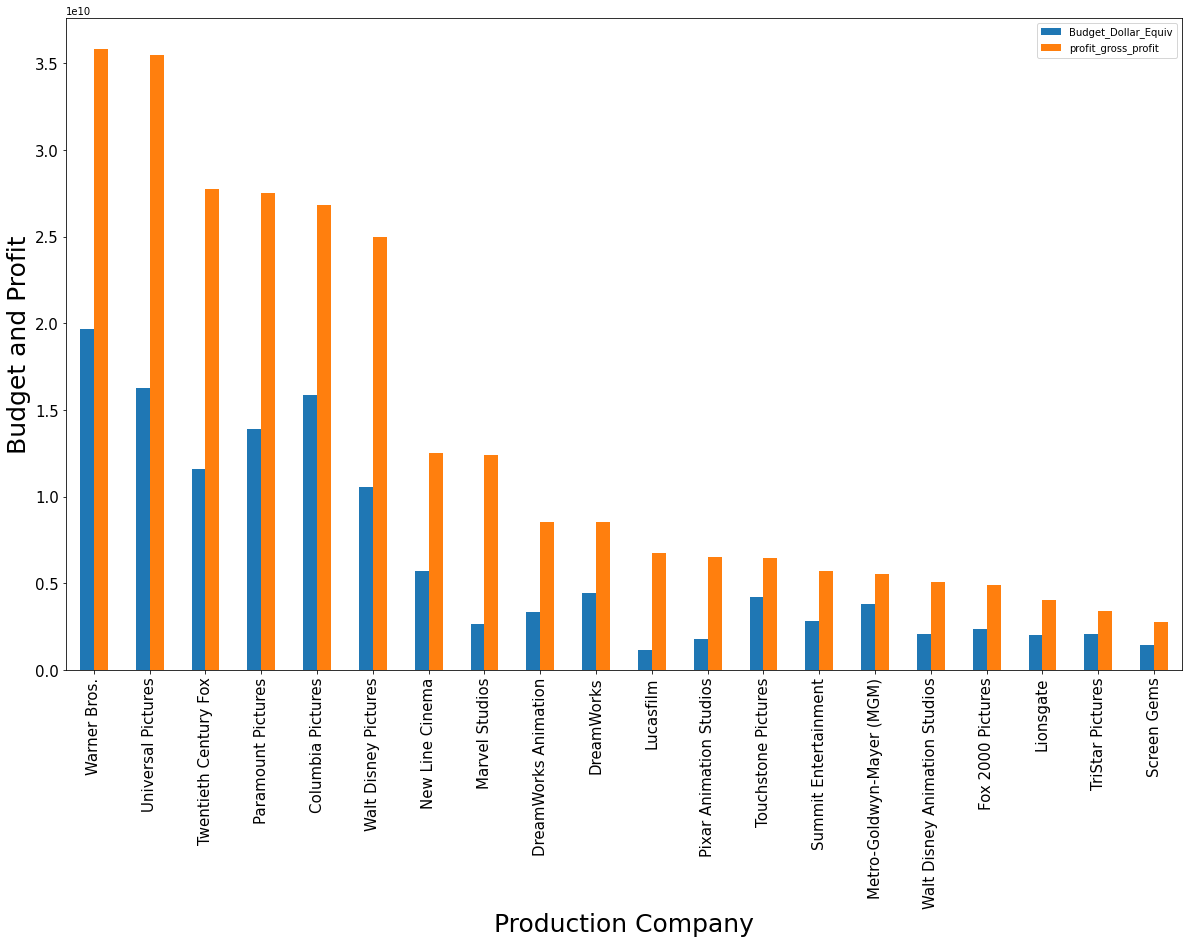

In [44]:
#plotting top studio profits
#top_20_studio.plot.bar(figsize=(15,10),)
top_20_studio.plot.bar(y=["Budget_Dollar_Equiv", "profit_gross_profit"], rot=90, figsize=(20,12),fontsize=15)
plt.xlabel("Production Company", fontsize=25)
plt.ylabel("Budget and Profit", fontsize=25)

In [45]:
# ploting the worst 20 performing studios
least_perf_20_studio = grouped_budget_df.nsmallest (20, ['profit_gross_profit', 'Budget_Dollar_Equiv'])
least_perf_20_studio.head()

,Budget_Dollar_Equiv,profit_gross_profit
production_company,,
Adela Pictures,854000000.0,-852102052.0
Radio Televisión Española (RTVE),488000000.0,-487945532.0
Canal+ España,489885000.0,-335252799.0
Franchise Pictures,512550000.0,-202736843.0
Maestranza Films,152500000.0,-152222404.0


Text(0, 0.5, 'Budget and loss')

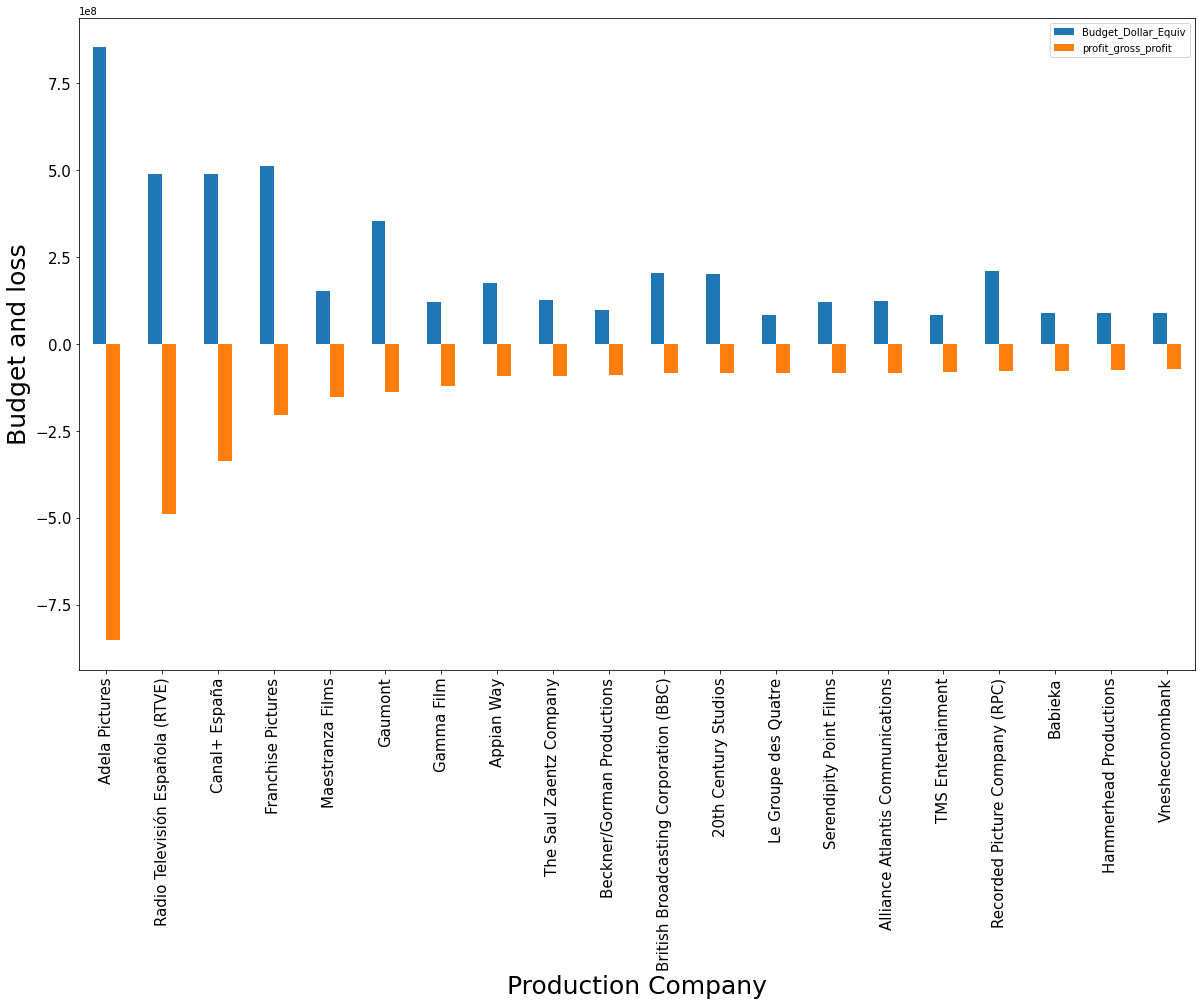

In [46]:
#studios with the least profit
least_perf_20_studio.plot.bar(y=["Budget_Dollar_Equiv", "profit_gross_profit"], rot=90, figsize=(20,12), fontsize=15)
plt.xlabel("Production Company", fontsize=25)
plt.ylabel("Budget and loss", fontsize=25)

In [47]:
#making a copy of the merged data

movie_preference = merged_studio_dollar_df
movie_preference.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget,norm_votes,norm_critics,norm_users,rated_movie
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,160.0,18000.0,8811.0,8811.0,-9189.0,-51.050000,0.024356,0.159319,0.022538,0.068738
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,16.0,800000.0,9183673.0,9183673.0,8383673.0,1047.959125,0.001298,0.015030,0.004202,0.006843
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,208.0,3726000.0,1236166.0,1349711.0,-2376289.0,-63.775872,0.068448,0.207415,0.047178,0.107680
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,122.0,1500000.0,19181.0,46008.0,-1453992.0,-96.932800,0.071341,0.121242,0.028078,0.073554
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,115.0,1500000.0,163577.0,457688.0,-1042312.0,-69.487467,0.092661,0.114228,0.029224,0.078704


In [48]:
#cleaning NA from movie_prefernce[avg_vote, review from critics and users]

movie_preference["reviews_from_critics"] = movie_preference["reviews_from_critics"].dropna()
movie_preference["avg_vote"] =  movie_preference["avg_vote"].dropna()
movie_preference["reviews_from_users"] = movie_preference["reviews_from_users"].dropna()
movie_preference

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget,norm_votes,norm_critics,norm_users,rated_movie
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,160.0,18000.0,8811.0,8811.0,-9189.0,-51.050000,0.024356,0.159319,0.022538,0.068738
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,16.0,800000.0,9183673.0,9183673.0,8383673.0,1047.959125,0.001298,0.015030,0.004202,0.006843
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,208.0,3726000.0,1236166.0,1349711.0,-2376289.0,-63.775872,0.068448,0.207415,0.047178,0.107680
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,122.0,1500000.0,19181.0,46008.0,-1453992.0,-96.932800,0.071341,0.121242,0.028078,0.073554
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,115.0,1500000.0,163577.0,457688.0,-1042312.0,-69.487467,0.092661,0.114228,0.029224,0.078704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85274,tt9214832,Emma.,Emma.,2020,2020-03-27,"Comedy, Drama",124,UK,English,Autumn de Wilde,...,188.0,10000000.0,10055355.0,25659965.0,15659965.0,156.599650,0.008671,0.187375,0.029892,0.075312
85397,tt9354944,Jexi,Jexi,2019,2019-10-11,"Comedy, Romance",84,"USA, Canada",English,"Jon Lucas, Scott Moore",...,42.0,5000000.0,6546159.0,9341824.0,4341824.0,86.836480,0.007433,0.041082,0.022252,0.023589
85460,tt9426210,Weathering with You,Tenki no ko,2019,2019-10-14,"Animation, Drama, Family",112,"Japan, China",Japanese,Makoto Shinkai,...,110.0,11100000.0,7798743.0,193176979.0,182076979.0,1640.333144,0.007099,0.109218,0.016808,0.044375
85740,tt9779516,Cosa mi lasci di te,I Still Believe,2020,2020-03-19,"Biography, Drama, Music",116,USA,English,"Andrew Erwin, Jon Erwin",...,52.0,12000000.0,9868521.0,13681524.0,1681524.0,14.012700,0.002675,0.051102,0.014325,0.022701


In [49]:
#normalise the columns
def norm(num, min, max):
  # max = seri.max()
  # min = seri.min()
  return (num-min) / (max-min)

In [50]:
movie_preference["norm_votes"] = movie_preference["votes"].apply(norm, args=(movie_preference["votes"].min(),movie_preference["votes"].max()))
movie_preference["norm_critics"] = movie_preference["reviews_from_critics"].apply(norm, args=(movie_preference["reviews_from_critics"].min(),movie_preference["reviews_from_critics"].max()))
movie_preference["norm_users"] = movie_preference["reviews_from_users"].apply(norm, args=(movie_preference["reviews_from_users"].min(),movie_preference["reviews_from_users"].max()))

In [51]:
movie_preference.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget,norm_votes,norm_critics,norm_users,rated_movie
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,160.0,18000.0,8811.0,8811.0,-9189.0,-51.050000,0.024356,0.159319,0.022538,0.068738
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,16.0,800000.0,9183673.0,9183673.0,8383673.0,1047.959125,0.001298,0.015030,0.004202,0.006843
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,208.0,3726000.0,1236166.0,1349711.0,-2376289.0,-63.775872,0.068448,0.207415,0.047178,0.107680
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,122.0,1500000.0,19181.0,46008.0,-1453992.0,-96.932800,0.071341,0.121242,0.028078,0.073554
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,115.0,1500000.0,163577.0,457688.0,-1042312.0,-69.487467,0.092661,0.114228,0.029224,0.078704


In [52]:
## average of selected normalised columns

movie_preference["rated_movie"]=(movie_preference["norm_votes"]+movie_preference["norm_critics"]+movie_preference["norm_users"])/3
movie_preference.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget,norm_votes,norm_critics,norm_users,rated_movie
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,160.0,18000.0,8811.0,8811.0,-9189.0,-51.050000,0.024356,0.159319,0.022538,0.068738
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,16.0,800000.0,9183673.0,9183673.0,8383673.0,1047.959125,0.001298,0.015030,0.004202,0.006843
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,208.0,3726000.0,1236166.0,1349711.0,-2376289.0,-63.775872,0.068448,0.207415,0.047178,0.107680
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,122.0,1500000.0,19181.0,46008.0,-1453992.0,-96.932800,0.071341,0.121242,0.028078,0.073554
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,115.0,1500000.0,163577.0,457688.0,-1042312.0,-69.487467,0.092661,0.114228,0.029224,0.078704


In [59]:
#  selecting a movie from a list  for a user to watch based on the user input of genre and year 


user_preference=True
while user_preference:
    g = input("YOUR PREFERED GENRE:  ") #input from user for prefered genre
    y = input("YOUR PREFERED YEAR:   ")# input year for movie
    print()
    
    
    #suggesting movies based on year input only
    if g=="" and movie_preference[movie_preference['year']==y].size > 0: #input value must be within the genre column else it =0
        movie_year = movie_preference[movie_preference['year']==y]
        
        print('No genre passed, suggesting movies based on year')
        movie_preference.nlargest(10,"rated_movie")
        print("SUGGESTED MOVIE: ")
        print(movie_year.nlargest(5,"rated_movie")['original_title'])

#Just in case the user changes his mind about the genre, he will have options 
        print()
        user_option = input('DO YOU LIKE THE SUGGESTED MOVIE? y/n:  ')
        if user_option == 'n':
            continue
        elif user_option == "y":
            print("Yay!! Go and enjoy your movies:)")
            break   
        else:
            print("run the program again and select the right inputs")
            break 
            
 
    #suggesting movies without genre and year input        
    elif g == "" and y=="":
        print('No genre or movie selected')
        print("SUGGESTED MOVIE: ")
        #print(movie_preference.nlargest(5,"rated_movie")['original_title'])
        print(movie_preference.nlargest(20,"rated_movie")['original_title'].sample(5)) #randomizing so user can have new list

        print()
        user_option = input('DO YOU LIKE THE SUGGESTED MOVIE? y/n:  ')
        if user_option == 'n':
            continue
        elif user_option == "y":
            print("Yay!! Go and enjoy your movies:)")
            break    
        else:
            print("run the program again and select the right inputs")
            break 
            
     
            
    #suggesting movies based on genre input only           
    elif y == "" and movie_preference[movie_preference['genre'].str.contains(g,case=False, regex=False)].size > 0: #or movie_preference[movie_preference['year']==str(y)].size < 1:
        #print('No Movie for that year, PLEASE MAKE NEW INPUT','bold')
        print('No year passed, suggesting movies based on genre')
        print("SUGGESTED MOVIE: ")
        print(movie_preference[movie_preference['genre'].str.contains(g,case=False, regex=False)].nlargest(5,"rated_movie")['original_title'])

        #Just in case the user changes his mind about the genre, he will have options 

        print()
        user_option = input('DO YOU LIKE THE SUGGESTED MOVIE? y/n:  ')
        if user_option == 'n':
            continue
        elif user_option == "y":
            print("Yay!! Go and enjoy your movies:)")
            break    
        else:
            print("run the program again and select the right inputs")
            break 
           
 
   
#suggesting movies based on genre and year input    
    else:
        print('suggesting movies based on year and gnere')
        movie_year = movie_preference[movie_preference['year']==y]

        print("SUGGESTED MOVIE: ")
        print(movie_year[movie_year['genre'].str.contains(g,case=False, regex=False)].nlargest(5,"rated_movie")['original_title'])

        #Just in case the user changes his mind about the genre, he will have options 
        print()
        user_option = input('DO YOU LIKE THE SUGGESTED MOVIE? y/n:  ')
        if user_option == 'n':
            continue
        elif user_option =="y":
            print("Enjoy the Movies selected")
            break
        else:
            print("run the program again and select the right options")
            break
            
        

print()
print("*******")        
print("Enjoy the Movie")
print("*******")

YOUR PREFERED GENRE:  drama
YOUR PREFERED YEAR:   2019

suggesting movies based on year and gnere
SUGGESTED MOVIE: 
82239                               Joker
73865                   Avengers: Endgame
81897    Once Upon a Time... in Hollywood
81146                        Gisaengchung
84442                                1917
Name: original_title, dtype: object

DO YOU LIKE THE SUGGESTED MOVIE? y/n:  y
Enjoy the Movies selected

*******
Enjoy the Movie
*******


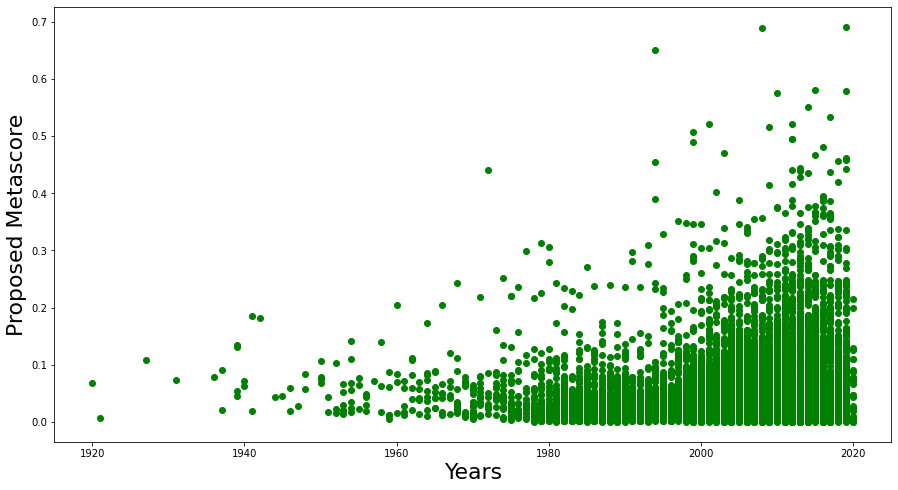

In [60]:
#ploting a graph of years vs rated_movie measure

plt.figure(figsize=(15,8))

plt.scatter(x=movie_preference["year"], y=movie_preference["rated_movie"], color="g")
plt.xlabel("Years", fontsize=22)
plt.ylabel("Proposed Metascore", fontsize=22)
plt.show()
